# Machine Learning and Image Recognition using MNIST dataset
## Joaquin Quintana

In this notebook, I use the following methods for classifying handwritten numbers: 

* [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [Linear Discriminant Analysis (LDA)](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)
* [k-nearest neighbors (KNN)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

Breifly, Linear Discriminant Analysis (LDA) and Logistic Regression are common linear models used for multiclass data and usually provide similar results. However, each has its place and ideal situation for when one would implement them. LDA and logistic regression both use linear decision boundaries, but they differ in how parameters are estimated for the model or the fitting method used. Logistic regression uses the maximum likelihood and LDA uses the estimated mean and variance from a normal distribution and assumes a common covariance matrix per class.
Following from how the models are fit we can assume that when the data is not a Gaussian distribution with common covariance matrix, logistic regression would outperform LDA and if this assumption is not true, then we would expect logistic regression to outperform LDA [1].

KNN uses distance measurements to determine the class which an observation is assigned to. The number of neighbors to consider can be set prior to training and this is typically determined experimentally. Overall, the algorithm assumes that things which are similar in nature will be nearer to one another and can be grouped together to differentiate other observations from each other. 

Knn is non-parametric and makes no assumptions about the decision boundaries so it is a bit more flexible than parametric models. Therefore, if the data is highly non-linear we can assume that KNN will outperform logistic regression and LDA as both are parametric models and make assumptions about the boundary shapes [1].

The problem addressed here was originally posed by the US Post Office. One of the data sets was assembled by the National Institute for Standards and Technology (NIST) and today is a [standard learning tool](https://en.wikipedia.org/wiki/MNIST_database) used in machine learning. Two MNIST datasets are looked at here. One is a smaller with a 1797 images and the second is the full dataset using 70,000 images. On the smaller dataset I perform logistic regression and KNN. For the larger dataset I perform logistic regression, LDA and KNN. 

In the next verison of this notebook I will use TensorFlow to implement a "deep learning" solution that has been show to achieve ~99% accuracy.


#### Load libraries we will use in the notebook.

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
# import sklearn
import sklearn.neighbors
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

## Using the Small Dataset

First I use a smaller [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) dataset which uses 1797 images that are have the shape 8x8 and contain 64 pixels. This dataset will be imported from sklearn in the next cell. 

In [2]:
from sklearn.datasets import load_digits

In [3]:
#determine the shape of the dataset as sklearn is fussy about the shape input. 
digits = load_digits()
print("Image Data Shape" , digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


Each image has tonal values with a range of [0-16] ([these are 4 bit grayscale images](https://en.wikipedia.org/wiki/Grayscale)). When training the data, we view the image as a 64-element set of features or factors. 

To view the images we need to rearrange the data into an 8x8 array. Then we can use  [matplotlib's imshow function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) to display the data. Here we will randomly select an image and show the 8x8 array and the corresponding image for this array. 

Digit: [7]
Image:
 [[ 0.  0.  2. 14. 16.  8.  0.  0.]
 [ 0.  0.  4. 12. 16. 11.  0.  0.]
 [ 0.  0.  0.  0. 16. 12.  0.  0.]
 [ 0.  0.  0.  3. 16.  9.  0.  0.]
 [ 0.  2.  5. 10. 16. 12.  2.  0.]
 [ 0. 16. 16. 16. 16. 14.  3.  0.]
 [ 0.  4.  4. 14. 12.  0.  0.  0.]
 [ 0.  0.  2. 16.  7.  0.  0.  0.]]


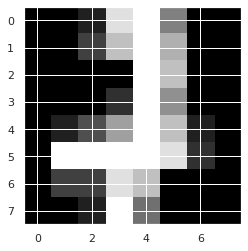

In [4]:
#use randint to randomly select a single int between 1 and 1797
k = np.random.randint(digits.data.shape[0],size = 1)

#show the digit information we are going to display
print('Digit:', digits.target[k])

#display image array 8x8
print('Image:\n', digits.data[k].reshape(8,8))

#display image array using inshow
plt.imshow(digits.data[k].reshape(8,8), cmap=plt.cm.gray);

Here I divide the `digits` dataset into a train and test set using even and odd indexes. This will be done using numpy indexing in lieu of a more robust splitting operation such as sklearns [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) so the results returned are always the same. In practice it would be better to use the more robust splitting methods. Then I preprocess the data to help with the learning process. 

In [5]:
#split data into train and test sets
dX_train, dX_test, dy_train, dy_test = digits.data[0::2], digits.data[1::2],digits.target[0::2], digits.target[1::2]

#preprocess the train and test set 
scaler = preprocessing.StandardScaler()
dX_train = scaler.fit_transform(dX_train)
dX_test = scaler.transform(dX_test)

### Small Digits using Logistic

Here I use the logistic classifier to fit the training data and then predict how well the model works using the test data. Report the accuracy score and the confusion matrix.

In [6]:
logreg = LogisticRegression()

#fit the model 
logreg.fit(dX_train, dy_train)

#store the scores in a variable to create a table at the end containing all results
lg_single_train_score = round(logreg.score(dX_train, dy_train),3)
lg_single_test_score = round(logreg.score(dX_test, dy_test),3)

#print scores
print('Training Score: ',lg_single_train_score)
print('Testing Score: ',lg_single_test_score)

Training Score:  1.0
Testing Score:  0.952


Let's look at the confusion matrix and classification report to get more details on how well this model does. 

The classification report shows precision, recall, F1-score and the accuracy score. 

The *precision* and *recall* can be combined into something called the $F_1$ score. This is,

$$F_1 = \frac{2}{1/\textrm{recall} + 1/\textrm{precision}}$$ 

This takes on value '1' for best and '0' for worst precision & recall -- i.e. it's a single "higher is better" metric to avoid making two comparisons.

Display the confusion matrix and classification report for the logisitc regression model.

In [7]:
#predict how well model fits the test data.
y_pred = logreg.predict(dX_test)

#return classification report
print('Classification Report: =')
print (classification_report(dy_test, y_pred))

Classification Report: =
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        88
           1       0.90      0.97      0.93        89
           2       0.94      1.00      0.97        91
           3       0.99      0.88      0.93        93
           4       0.97      0.97      0.97        88
           5       0.95      0.96      0.95        91
           6       0.97      0.99      0.98        90
           7       0.98      0.97      0.97        91
           8       0.93      0.90      0.91        86
           9       0.92      0.92      0.92        91

    accuracy                           0.95       898
   macro avg       0.95      0.95      0.95       898
weighted avg       0.95      0.95      0.95       898



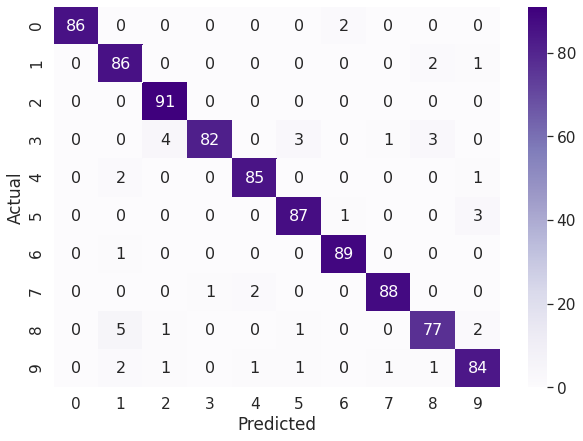

In [8]:
# Create a confusion matrix and disaply with seaborns heatmap
cm = confusion_matrix(dy_test, y_pred)
df_cm = pd.DataFrame(cm, columns=np.unique(y_pred), index = np.unique(y_pred))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Purples", annot=True,annot_kws={"size": 16});

From the confusion matrix we can see the following digits are being missclassified. 

The following misclassifications can be seen in the confusion matrix. For example this can be interpreted as {4,1}, which translates to 4 was misclassifed as a 1 at at least one time or more. 

* {4,1},{6,1},{8,1},{9,1}
* {3,2},{8,2},{9,2}
* {7,3}
* {7,4},{9,4}
* {3,5},{8,5},{9,5}
* {0,6},{5,6}
* {3,7},{9,7}
* {1,8},{3,8},{9,8}
* {1,9},{4,9},{5,9},{8,9}

In this data I see 4 is being missclassified as 1 two times so I'll use that here to show how to identify the misclassified digits. 

In [9]:
#place the data into a dataframe and find the missclassification using boolean
df = pd.DataFrame({"real": dy_test,"prediction" : y_pred})

#create target column 
df = df.assign(target = 0) # create column of zeros named target

#place a one where ever digits in real and prediction
df.loc[df.real != df.prediction, 'target'] = 1 

#show the head of the new dataframe with target column
df.head()

,real,prediction,target
0,1,1,0
1,3,3,0
2,5,9,1
3,7,7,0
4,9,9,0


#### I will use the two cases where 4 was misclassified as 1 for the remainder of this section. These can be found at indexes 43 and 123

In [10]:
#find the missclassified numbers 

#find all values which are missclssified
df = df.loc[df.target == 1] #[43,123]

#find just the rows where 4 is missclassified 
df = df[(df.real == 4)] 

#now make sure the prediction was incorrect
df = df[(df.prediction == 1)]

#display the two missclassified 4's which were predicited to be 1 by the model
df

,real,prediction,target
43,4,1,1
123,4,1,1


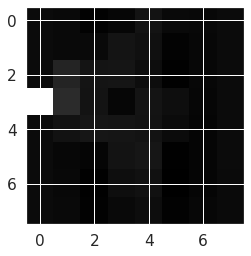

In [11]:
# use pandas index to access the real image from the test data. 
plt.imshow(dX_test[43].reshape(8,8),cmap=plt.cm.gray);

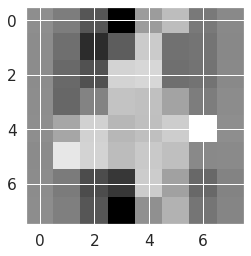

In [12]:
plt.imshow(dX_test[123].reshape(8,8),cmap=plt.cm.gray);

The digit classification problem involves a *multinomial*, or more than two level outcome. By default, the `LogisticRegression` method uses a series of binomial logistic regression fits for the different outcomes. 

**[The `predict_proba` routine in `LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) returns the probability of the fit for each  possible outcome (e.g. the digits '0' through '9'). The predicted outcome (i.e. the result of `predict`) is the one with the highest predicted outcome.**

Here I use this information to show that sklearn does indeed treat the two digits differently as is expected from visiual comparison and  by inspection of the array intensity values. 

In [13]:
# check if the probabilites are the same
Index43 = logreg.predict_proba(dX_test[43].reshape(1, -1))
print('Index 43 predictions: ',Index43,'\n')

Index123 = logreg.predict_proba(dX_test[123].reshape(1, -1))
print('Index 123 predictions:',Index123,'\n')

#check is the two predictions are equivalent
[Index43 == Index123]

Index 43 predictions:  [[8.78289140e-06 9.52845450e-01 1.14550293e-06 5.87685363e-07
  4.38019096e-02 2.46427865e-03 2.20385169e-04 4.56730626e-05
  5.95198847e-04 1.65883623e-05]] 

Index 123 predictions: [[2.03929445e-06 5.22678829e-01 2.16794659e-07 8.11148336e-06
  4.74853553e-01 3.77214508e-06 1.21532620e-03 3.51258439e-04
  8.86787226e-04 1.06925253e-07]] 



[array([[False, False, False, False, False, False, False, False, False,
         False]])]

As can be seen above the predictions for each case where a 4 was misclassifed as a 1 have different outputs when using predict_prob. This can also be confirmed visually as the two images look completely different. 

### Small Digits using KNN

Now, I use the K-Nearest Neighbors to fit and predict the test and train data. I'll select a $k \in \{1,2,3,4,5\}$ that achieves the highest accuracy. Then I'll print the accuracy score and confusion matrix for the $k$ with the highest accuracy.
Already scaled dX_train, dX_test, dy_train, dy_test so no need to do it again.

In [14]:
# Experimentally determine which k gives the highest accuracy using recall and use this for model
recalls = []
ks = list(range(1,6))
for k in ks:
    neigh = KNeighborsClassifier(n_neighbors= k)
    neigh.fit(dX_train, dy_train)
    knn_hat = neigh.predict(dX_test)
    recalls.append( sklearn.metrics.recall_score(dy_test, knn_hat, average='micro') )
kdat =pd.DataFrame(recalls, ks)

Smallest k with highest score, 3 and score for k    0.965479
Name: 3, dtype: float64


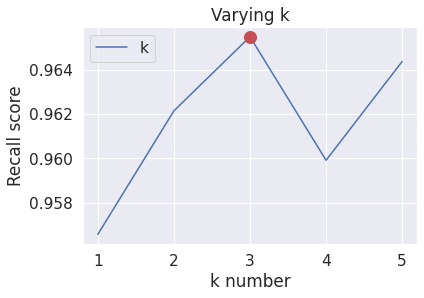

In [15]:
kdat.columns = ['k']
k = kdat['k'].idxmax()
print('Smallest k with highest score,', k,'and score for', kdat.loc[k])

#plot the k we found using recall on plot. 
kdat.plot();
#place redot on k with highest recall
plt.plot(k,kdat.loc[k].ravel(),'ro',markersize = 12)
plt.title('Varying k');
plt.xlabel('k number');
plt.ylabel('Recall score');

In [16]:
#using the experimentally determined k from above
neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(dX_train, dy_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
#store the scores in a variable to create a table at the end of all results
Knn_train_score = round(neigh.score(dX_train, dy_train),3)
Knn_single_test_score = round(neigh.score(dX_test, dy_test),3)

#print scores
print('Training Score: ',Knn_train_score)
print('Testing Score: ',Knn_single_test_score)

Training Score:  0.986
Testing Score:  0.965


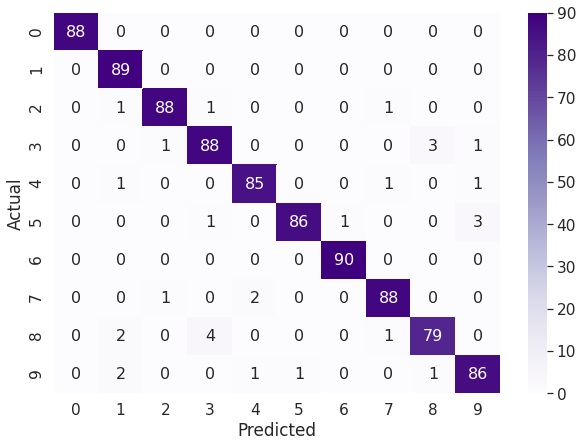

In [18]:
knn_hat = neigh.predict(dX_test)

# Create a confusion matrix and diaply with seaborns heatmap
cm = confusion_matrix(dy_test, knn_hat)
df_cm = pd.DataFrame(cm, columns=np.unique(y_pred), index = np.unique(knn_hat))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Purples", annot=True,annot_kws={"size": 16});

As can be seen in the confusion matrix above these are the misclassifications produced using the KNN model. For example, this can be interpreted as {2,1}, which translates to 2 was misclassifed as a 1 at least once or more. 

* {2,1},{4,1},{8,1},{9,1}
* {3,2},{7,2}
* {2,3},{5,3},{8,3}
* {7,4},{9,4}
* {9,5}
* {5,6}
* {2,7},{4,7},{8,7}
* {3,8},{9,8}
* {3,9},{4,9},{5,9}

I'll select one confused digit and print out the image and the probability estimates for the data. 

real          5
prediction    9
target        1
Name: 2, dtype: int64


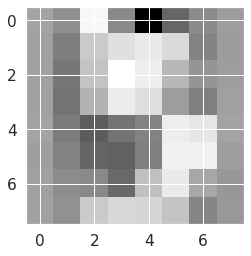

In [19]:
#place the data into a dataframe and find the missclassification using boolean
df = pd.DataFrame({"real": dy_test,"prediction" : knn_hat})

#create target column 
df = df.assign(target = 0) # create column of zeros named target

#place a one where ever digits in test and truth differ.
df.loc[df.real != df.prediction, 'target'] = 1 
print(df.loc[2])

#show one confused image
plt.imshow(dX_test[2].reshape(8,8), cmap=plt.cm.gray);

In [20]:
#show predictied probabilites for this data
neigh.predict_proba(dX_test[2].reshape(1, -1))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

Note: KNN returns a set contaning only 0s and 1s in this case while logistic regression returned a set of small numbers for predictied probabilities. This results would change as k is increased because the options for classification would increase as well.

### Using the larger MNIST data

Next I use the larger MNIST dataset which uses 70,000 images that have the shape 28x28, contain 784 pixels per image and intensity values ranging from [0-255] ([8-bit grayscale images](https://www.mathworks.com/help/matlab/creating_plots/working-with-8-bit-and-16-bit-images.html)). This dataset will be imported in the next cell using sklearn's fet_openml. This is the same data used in the TensorFlow tutorial.

Here I will highlight the performance of different classification tools and their impact on usability in an application.

**Note:** Loading the dataset may take sometime depending on the computer specifications and therefore the model execuation times will also vary for the same reason.

In [21]:
from sklearn.datasets import fetch_openml

In [22]:
mnist = fetch_openml("mnist_784")

In [23]:
#import sklearn.datasets
print("Image Data Shape" , mnist.data.shape)
print("Label Data Shape", mnist.target.shape)

Image Data Shape (70000, 784)
Label Data Shape (70000,)


The dataset has a `data` array of 784 features or factors that can be reorganized into an image along with with the `target` value indicating the correct digit.

Show image as an array first and then data array as an image. 

In [24]:
#use randint to randomly select a single int between 1 and 1797
k = np.random.randint(mnist.data.shape[0],size = 1)

#Reoragnize data to make it easier to view. This is, make the image number the columns and pixel values the index
dat = pd.DataFrame(mnist.data).T
print('values:', dat[k].values.reshape(28,28))

values: [[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   7. 174. 253.  74.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.  15. 159. 252. 252.  74.   0.   0.   0.   0

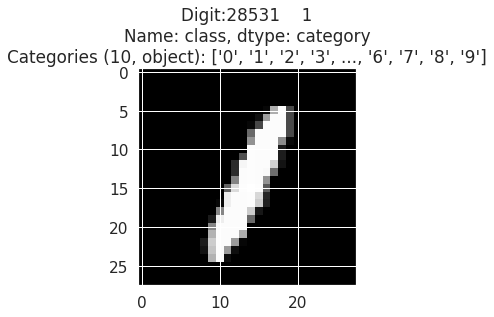

In [25]:
#Display array as an image
plt.imshow(dat[k].values.reshape(28,28),cmap=plt.cm.gray);
plt.title(label='Digit:' + str(mnist.target[k]));

Again - I divide the `digits` dataset into a train and test set using even and odd indexes. This will be done using numpy indexing in lieu of a more robust splitting operation such as sklearns [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) so the results returned are always the same. In practice it would be better to use the more robust splitting methods. 

In [26]:
mX_train, mX_test, my_train, my_test = mnist.data[0::2], mnist.data[1::2],mnist.target[0::2], mnist.target[1::2]
print(mX_train.shape)
print(my_train.shape)

(35000, 784)
(35000,)


In [27]:
#preprocess the train and test set 
scaler = preprocessing.StandardScaler()
mX_train = scaler.fit_transform(mX_train)
mX_test = scaler.transform(mX_test)

Now, let's train a logistic regression model on the MNIST training data. I will [ prefix the fit function by using the %time "magic" command](http://ipython.readthedocs.io/en/stable/interactive/magics.html). This will measure how long the fitting process takes. 


Using the default method I've been using for logistic classification problems will take a long time because the default method fits $n$ binomial classification problems to determine the multinomial model. 


Logsitic regression uses *maximum liklihood estimation* to determine the most likely outcome. There are numerous *solvers* (see [the LogisticRegression manual](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) ) that can be used and some of them are more appropriate for large multinomial problems because they fit the data to all the outcomes in one go. 

Instead of wasting time I use sklearns suggested solver which makes convergence much faster: [MNIST classification using multinomial logistic + L1](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html). I also set [n_jobs=-1](https://scikit-learn.org/stable/glossary.html#term-n_jobs) to utilize all the cores on the CPU. If you have fewer cores this will take longer and the opposite is true for more cores. 

In [28]:
%time logreg = LogisticRegression(C=350, penalty='l1', solver='saga', tol=0.1, n_jobs=-1)

CPU times: user 16 µs, sys: 1e+03 ns, total: 17 µs
Wall time: 19.1 µs


In [29]:
#fit the model 
%time X = logreg.fit(mX_train, my_train)

CPU times: user 21.1 s, sys: 160 ms, total: 21.2 s
Wall time: 21.3 s


Now, compute the predictions and `predict_proba` for the test dataset and use %time to determine how long the predictions take. Report the accuracy score and the confusion matrix. 

In [30]:
%time ld_hat = logreg.predict(mX_test)

CPU times: user 172 ms, sys: 3.78 ms, total: 176 ms
Wall time: 57.4 ms


In [31]:
#store the scores in a variable to create a table at the end of all results
lg_Large_train_score = round(logreg.score(mX_train, my_train),3)
lg_Large_test_score = round(logreg.score(mX_test, my_test),3)

#print scores
print('Training Score: ',lg_Large_train_score)
print('Testing Score: ',lg_Large_test_score)

Training Score:  0.871
Testing Score:  0.878


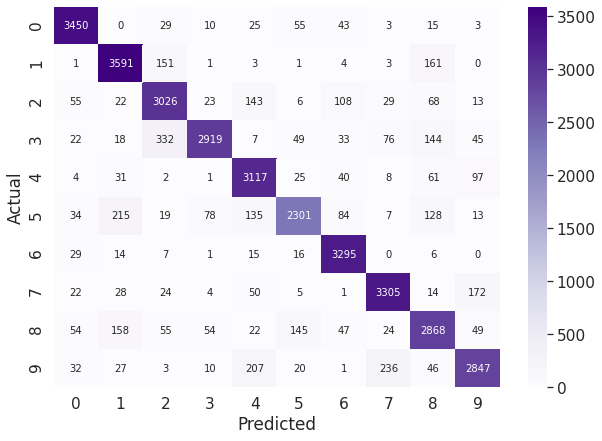

In [32]:
# Create a confusion matrix and display with seaborns heatmap
cm = confusion_matrix(my_test, ld_hat)
df_cm = pd.DataFrame(cm, columns=np.unique(y_pred), index = np.unique(ld_hat))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Purples", annot=True,fmt='g',annot_kws={"size": 10});

In [33]:
#classification report
print(classification_report(my_test, ld_hat))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3633
           1       0.88      0.92      0.90      3916
           2       0.83      0.87      0.85      3493
           3       0.94      0.80      0.87      3645
           4       0.84      0.92      0.88      3386
           5       0.88      0.76      0.82      3014
           6       0.90      0.97      0.94      3383
           7       0.90      0.91      0.90      3625
           8       0.82      0.83      0.82      3476
           9       0.88      0.83      0.85      3429

    accuracy                           0.88     35000
   macro avg       0.88      0.88      0.88     35000
weighted avg       0.88      0.88      0.88     35000



Now, I compute the probability scores for each outcome class using `predict_proba` (computed at the beginning of this model) and plot the KDE for of their values. I use the output of `predict_proba` and then use `ravel()` to turn it into single flat array suitable for feeding into [sns.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).

(35000, 10)


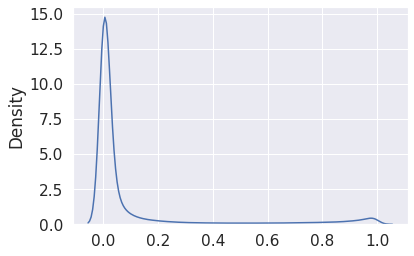

In [34]:
yhat_p = logreg.predict_proba(mX_test)
print(yhat_p.shape)
sns.kdeplot(yhat_p.ravel());

### Linear Discriminant Analysis
LDA is supposed to be superior for multinomial classification. Here I run the same classification problem using LDA and time the fitting proccess to experimentally determine which model works best. 

In [35]:
ld = LinearDiscriminantAnalysis()
%time ld_model = ld.fit(mX_train, my_train)

CPU times: user 17.6 s, sys: 688 ms, total: 18.2 s
Wall time: 6.95 s


Predict the outcomes and report the accuracy score and confusion matrix. Time how long it takes to run the prediction using `%time`.

In [36]:
%time ld_hat = ld_model.predict(mX_test)

CPU times: user 241 ms, sys: 35 µs, total: 241 ms
Wall time: 60 ms


In [37]:
# compute accurace for LDA model

#store the scores in a variable to create a table at the end of all results
ld_Large_train_score = round(ld_model.score(mX_train, my_train),3)
ld_Large_test_score = round(ld_model.score(mX_test, my_test),3)

#print scores
print('Training Score: ',ld_Large_train_score)
print('Testing Score: ',ld_Large_test_score)

Training Score:  0.865
Testing Score:  0.853


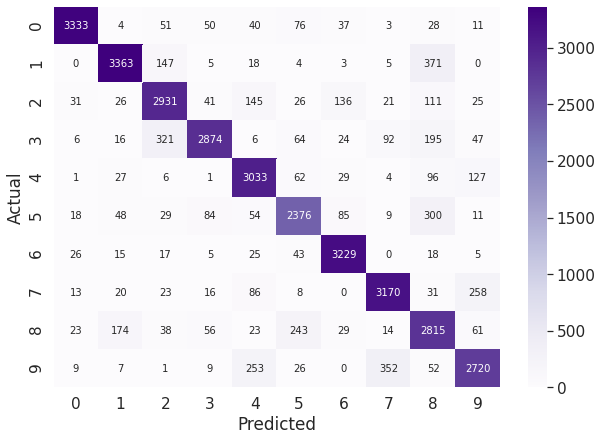

In [38]:
# Create a confusion matrix and dispaly with seaborns heatmap
cm = confusion_matrix(my_test, ld_hat)
df_cm = pd.DataFrame(cm, columns=np.unique(y_pred), index = np.unique(ld_hat))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Purples", annot=True,fmt='g',annot_kws={"size": 10});

In [39]:
print(classification_report(my_test, ld_hat))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      3633
           1       0.91      0.86      0.88      3916
           2       0.82      0.84      0.83      3493
           3       0.91      0.79      0.85      3645
           4       0.82      0.90      0.86      3386
           5       0.81      0.79      0.80      3014
           6       0.90      0.95      0.93      3383
           7       0.86      0.87      0.87      3625
           8       0.70      0.81      0.75      3476
           9       0.83      0.79      0.81      3429

    accuracy                           0.85     35000
   macro avg       0.85      0.85      0.85     35000
weighted avg       0.86      0.85      0.85     35000



Print the distribution of outcome probabilities from `predict_proba` KDE. This can also be done using a histogram if desired. 

(35000, 10)


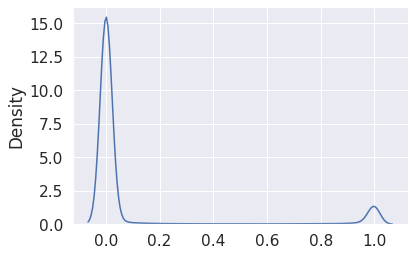

In [40]:
yhat_p = ld_model.predict_proba(mX_test)
print(yhat_p.shape)
sns.kdeplot(yhat_p.ravel());

Here logistic regression out performed LDA with accuracy score of 0.88 and 0.85, respectively. 

**Note:** The predict_proba returned a majority of values around 0 for logistic regressionand and a majority of values around 1 for LDA.

### k-Nearest Neighbors (KNN)

Lastly, I perform the same steps using the KNN algorithm. Here I use use $k=1$ for the KNN method and record the fitting time.

In [41]:
# Experimentally determine which k gives the highest accuracy using recall and use this for model
recalls = []
ks = list(range(1,10))
for k in ks:
    neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors= k)
    neigh.fit(mX_train, my_train)
    knn_hat = neigh.predict(mX_test)
    recalls.append( sklearn.metrics.recall_score(my_test, knn_hat, average='micro') )
kdat =pd.DataFrame(recalls, ks)

kdat.columns = ['k']
k = kdat['k'].idxmax()
print('Smallest k with highest score,', k,'and score for', kdat.loc[k])

Smallest k with highest score, 3 and score for k    0.929371
Name: 3, dtype: float64


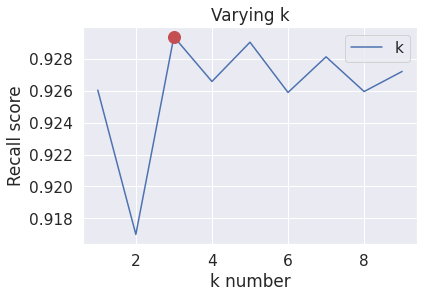

In [42]:
#plot the k we found using recall on plot. 
kdat.plot();
#place redot on k with highest recall
plt.plot(k,kdat.loc[k].ravel(),'ro',markersize = 12)
plt.title('Varying k');
plt.xlabel('k number');
plt.ylabel('Recall score');

In [43]:
neigh = KNeighborsClassifier(n_neighbors = k, n_jobs=-1)
%time neigh.fit(mX_train, my_train)

CPU times: user 72.6 ms, sys: 0 ns, total: 72.6 ms
Wall time: 69.9 ms


KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

Now run the prediction using your KNN model. This will take a long time depending on your workstation. Again I use [n_jobs=-1](https://scikit-learn.org/stable/glossary.html#term-n_jobs) to utilize all the cores on the CPU.

In [44]:
%time knn_hat = neigh.predict(mX_test)

CPU times: user 6min 1s, sys: 21.4 s, total: 6min 22s
Wall time: 1min 10s


In [45]:
knn_cm = sklearn.metrics.confusion_matrix(my_test, knn_hat)
print('KNN(', k,') confusion matrix is = \n', '\n',knn_cm,'\n')
print('Success = ', knn_cm[1,1] / (knn_cm[1,0] + knn_cm[1,1]),'\n')
print(sklearn.metrics.classification_report(my_test, knn_hat))

KNN( 3 ) confusion matrix is = 
 
 [[3523    2   26    8    0   31   34    2    3    4]
 [   4 3881   10    3    0    1    8    4    4    1]
 [  62   21 3215   42   38   14   40   18   29   14]
 [  25   13  151 3256    8   79    7   30   55   21]
 [   1   62   19    2 3141   26   27   20   12   76]
 [   9    8   10   66   11 2799   80    2   21    8]
 [  24    7   20    3    8   12 3307    0    2    0]
 [   4   20   25    9   52    6    1 3358    2  148]
 [  58   52   39   41   38  187   23   18 3003   17]
 [   8    9   14   12   50   14    0  268    9 3045]] 

Success =  0.998970398970399 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3633
           1       0.95      0.99      0.97      3916
           2       0.91      0.92      0.92      3493
           3       0.95      0.89      0.92      3645
           4       0.94      0.93      0.93      3386
           5       0.88      0.93      0.91      3014
           6       0.9

### Comparison

**Results:** Knn performed the best, logistic regression next and LDA last with accuracy scores of 0.93, 0.88 and 0.85, respectively. I would use knn as it is performing the best and we could use the output from the confusion matrix to determine which digits are being  missclassified and determine other methods such as filters to increase the models ability to classify these digits. Alternatively, deep learning could be used which has been shown to produce accuracy scores of ~99%. 

With regards to time computation time. Logistic regression and LDA show similar times with one having a longer fit than prediction and the opposite for the other. KNN took much longer to perform, but did perform the best overall. With tweaking of the parameters it was possible to reduce all of the models timing and could probably be improved further if desired but I was satisfied with these results. 

# Refernce

1. Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani. 2021. An introduction to statistical learning: with applications in R, Boston: Springer.